In [145]:
from html import unescape
from bs4 import BeautifulSoup
import re
import random
from fake_useragent import UserAgent
import time
import requests
from pprint import pprint
import nltk
import string
from nltk.tokenize import word_tokenize
from collections import Counter

In [5]:
session = requests.session()
ua = UserAgent(verify_ssl=False)

In [111]:
#page_number = 1
url = f'https://www.kinopoisk.ru/film/1236063/reviews/ord/date/status/all/perpage/200/'
req = session.get(url, headers={'User-Agent': ua.random})
page = req.text
soup = BeautifulSoup(page, 'html.parser')

Качаю по 30 пол и отр отзывов, кладу их в два списка. Также чищю текст.

In [104]:
def cleaner(review):
    b_result = ""
    for c in review:
        if c not in string.punctuation:
            b_result += c
    tokens = [w.lower() for w in word_tokenize(b_result) if w.isalpha()]
    return tokens

In [108]:
negative = []
reviews = soup.find_all('div', {'class': 'response bad'})
for x in range(30):    
    review = reviews[x].find('span').text
    review = re.sub(r'\n', '', review)
    review = re.sub(r'\r', ' ', review)
    review = cleaner(review)
    negative.append(review)

In [106]:
positive = []
reviews = soup.find_all('div', {'class': 'response good'})
for x in range(30):    
    review = reviews[x].find('span').text
    review = re.sub(r'\n|', '', review)
    review = re.sub(r'\r', ' ', review)
    review = cleaner(review)
    positive.append(review)

In [112]:
url = f'https://www.kinopoisk.ru/film/1236063/reviews/ord/date/status/all/perpage/200/page/2/'
req = session.get(url, headers={'User-Agent': ua.random})
page = req.text
soup = BeautifulSoup(page, 'html.parser')
test_10 = []
for x in range(5):
    reviews = soup.find_all('div', {'class': 'response good'})
    review = reviews[x].find('span').text
    review = re.sub(r'\n|', '', review)
    review = re.sub(r'\r', ' ', review)
    review = cleaner(review)
    test_10.append(review)

for x in range(5):
    reviews = soup.find_all('div', {'class': 'response bad'})  
    review = reviews[x].find('span').text
    review = re.sub(r'\n', '', review)
    review = re.sub(r'\r', ' ', review)
    review = cleaner(review)
    test_10.append(review)

Теперь начальные формы. Я не хочу делать в функции, так менее красиво имхо. Но могу/ А ещё можно было бы сделать список для каждого отзыва, но вроде это нам не нужно.

In [137]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
negative_wordforms = []
for review in negative:
    n = 0
    for word in review:
        info = morph.parse(word)
        wordform = info[0].word
        negative_wordforms.append(wordform)
    n+=1

In [140]:
morph = MorphAnalyzer()
positive_wordforms = []
for review in positive:
    n = 0
    for word in review:
        info = morph.parse(word)
        wordform = info[0].word
        positive_wordforms.append(wordform)
    n+=1

Так. Я молодец. Можно переходить к третьему пункту. Сразу отправляю жабу.

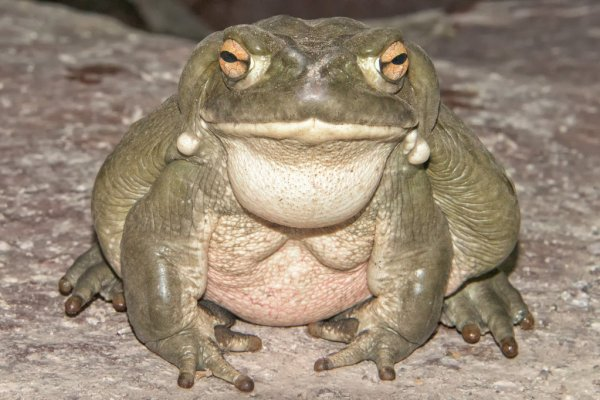

In [136]:
from IPython.display import Image
Image(filename =r'jaba.jpg')

Возможно немного через жопу и с кучей словарей, но работает

In [162]:
unique_positive = []
for word in positive_wordforms:
    if not word in negative_wordforms:
        unique_positive.append(word)

In [165]:
unique_positive_freqlist = {}
for word in positive_freqlist:
    if word[0] in unique_positive:
        unique_positive_freqlist[word[0]] = word[1]

In [174]:
unique_positive_freqlist_cleared = {}
for key, value in unique_positive_freqlist.items():
    if value > 2:
        unique_positive_freqlist_cleared[key] = value

И для негативных отзывов

In [177]:
unique_negative = []
for word in negative_wordforms:
    if not word in positive_wordforms:
        unique_negative.append(word)

In [178]:
unique_negative_freqlist = {}
for word in negative_freqlist:
    if word[0] in unique_negative:
        unique_negative_freqlist[word[0]] = word[1]

In [179]:
unique_negative_freqlist_cleared = {}
for key, value in unique_negative_freqlist.items():
    if value > 2:
        unique_negative_freqlist_cleared[key] = value